In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/assignment 3

/content/drive/MyDrive/assignment 3


In [ ]:
ls

flowers/  flowers.h5  testing/  training/


Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dg=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_dg=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_dg.flow_from_directory(r'/content/drive/MyDrive/assignment 3/training',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 3448 images belonging to 5 classes.


In [ ]:
x_test=train_dg.flow_from_directory(r'/content/drive/MyDrive/assignment 3/testing',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1132 images belonging to 5 classes.


Create Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()

Adding Layers(convolution,Maxpooling,Flatten,Dense layers,Output)

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(5,activation='softmax'))

Complie the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


144/144 [==============================] - 549s 4s/step - loss: 1.6716 - accuracy: 0.1926 - val_loss: 1.6249 - val_accuracy: 0.1696
Epoch 2/10
144/144 [==============================] - 43s 298ms/step - loss: 1.6297 - accuracy: 0.1926 - val_loss: 1.6070 - val_accuracy: 0.1696
Epoch 3/10
144/144 [==============================] - 43s 296ms/step - loss: 1.6131 - accuracy: 0.1984 - val_loss: 1.6008 - val_accuracy: 0.2827
Epoch 4/10
144/144 [==============================] - 43s 296ms/step - loss: 1.6071 - accuracy: 0.2100 - val_loss: 1.5988 - val_accuracy: 0.2173
Epoch 5/10
144/144 [==============================] - 42s 295ms/step - loss: 1.6052 - accuracy: 0.2343 - val_loss: 1.5990 - val_accuracy: 0.2173
Epoch 6/10
144/144 [==============================] - 43s 295ms/step - loss: 1.6046 - accuracy: 0.2343 - val_loss: 1.5993 - val_accuracy: 0.2173
Epoch 7/10
144/144 [==============================] - 42s 292ms/step - loss: 1.6045 - accuracy: 0.2343 - val_loss: 1.5995 - val_accuracy: 0.217

Save the model

In [ ]:
model.save('flowers.h5')

Test the model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('flowers.h5')

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/assignment 3/training/dandelion/10043234166_e6dd915111_n.jpg')

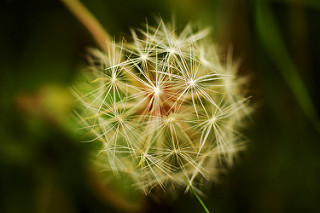

In [ ]:
img

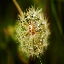

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/assignment 3/training/dandelion/10043234166_e6dd915111_n.jpg',target_size=(64,64))
img

In [ ]:
x=image.img_to_array(img)
x

array([[[ 3.,  6.,  0.],
        [ 8.,  9.,  1.],
        [ 7.,  8.,  0.],
        ...,
        [35., 44.,  1.],
        [35., 44.,  1.],
        [35., 43.,  2.]],

       [[ 5.,  8.,  1.],
        [ 6.,  7.,  0.],
        [ 6.,  7.,  1.],
        ...,
        [30., 36.,  0.],
        [30., 38.,  0.],
        [31., 39.,  0.]],

       [[ 7.,  8.,  2.],
        [ 7.,  8.,  2.],
        [ 5.,  8.,  0.],
        ...,
        [19., 22.,  1.],
        [19., 24.,  1.],
        [23., 29.,  3.]],

       ...,

       [[17., 20.,  1.],
        [23., 27.,  2.],
        [24., 30.,  2.],
        ...,
        [23., 27.,  0.],
        [23., 29.,  1.],
        [21., 27.,  1.]],

       [[16., 19.,  0.],
        [23., 28.,  0.],
        [26., 31.,  1.],
        ...,
        [19., 23.,  0.],
        [25., 27.,  5.],
        [19., 24.,  1.]],

       [[17., 20.,  1.],
        [22., 26.,  0.],
        [26., 31.,  1.],
        ...,
        [18., 21.,  0.],
        [20., 24.,  1.],
        [21., 25.,  2.]]

In [ ]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 3.,  6.,  0.],
         [ 8.,  9.,  1.],
         [ 7.,  8.,  0.],
         ...,
         [35., 44.,  1.],
         [35., 44.,  1.],
         [35., 43.,  2.]],

        [[ 5.,  8.,  1.],
         [ 6.,  7.,  0.],
         [ 6.,  7.,  1.],
         ...,
         [30., 36.,  0.],
         [30., 38.,  0.],
         [31., 39.,  0.]],

        [[ 7.,  8.,  2.],
         [ 7.,  8.,  2.],
         [ 5.,  8.,  0.],
         ...,
         [19., 22.,  1.],
         [19., 24.,  1.],
         [23., 29.,  3.]],

        ...,

        [[17., 20.,  1.],
         [23., 27.,  2.],
         [24., 30.,  2.],
         ...,
         [23., 27.,  0.],
         [23., 29.,  1.],
         [21., 27.,  1.]],

        [[16., 19.,  0.],
         [23., 28.,  0.],
         [26., 31.,  1.],
         ...,
         [19., 23.,  0.],
         [25., 27.,  5.],
         [19., 24.,  1.]],

        [[17., 20.,  1.],
         [22., 26.,  0.],
         [26., 31.,  1.],
         ...,
         [18., 21.,  0.],
        

In [ ]:
y=np.argmax(model.predict(x),axis=1)
y

array([0])

In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}